In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# import time
import pickle


import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

import os
os.getcwd()

# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_Python Implementation'

The following code allows us to generate random valid grammar strings:
(Source: https://www.deep-teaching.org/notebooks/sequence-learning/exercise-pytorch-char-rnn-reber-grammar)

In [108]:
chars='ATSXPVZ'
emb_chars = 'TP'

graph = [[(1,5),('T','P')] , [(1,2),('S','X')], \
           [(3,5),('V','X')], [(6,),('Z')], \
           [(4,2,3),('T','P','S')], [(4,),('V')] ]


# TO GENERATE SEQUENCES OF SRG
def generateSequences(minLength=5):
    """
    Returns a tuple with
    first entry: as array of chars generated from SRG
    second entry: as array of next possible transitions from each char in the first entry
    """
    while True:
        inchars = ['A']
        node = 0
        outchars = []    
        while node != 6:
            transitions = graph[node]
            i = np.random.randint(0, len(transitions[0]))
            inchars.append(transitions[1][i])
            outchars.append(transitions[1])
            node = transitions[0][i]
        if len(inchars) > minLength:  
            return inchars, outchars
        
        
# TO GENERATE ONE-HOT ENCODINGS OF THE OUTPUT ARRAYS OF 'generateSequences()' function
def get_one_srg(minLength=5):
    inchars, outchars = generateSequences(minLength)
#     print(inchars)
    inseq = []
    outseq= []
    for i,o in zip(inchars, outchars): 
        inpt = np.zeros(7)
        inpt[chars.find(i)] = 1.     
        outpt = np.zeros(7)
        for oo in o:
            outpt[chars.find(oo)] = 1.
        inseq.append(inpt)
        outseq.append(outpt)
    return inseq, outseq


# TO CONVERT BACK INTO SYMBOLS FROM THE ONE-HOT ENCODINGS
def OnehotToWord(sequence):
    """
    converts a sequence (one-hot) in a reber string
    """
    reberString = ''
    for s in sequence:
        index = np.where(s==1.0)[0][0]
        reberString += chars[index]
    reberString+='Z'
    return reberString


def get_n_srg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_srg(minLength))
    return examples



# ____________________________________For ERG strings__________________________________________#


def get_char_onehot(char):
    char_oh = np.zeros(7)
    if chars.find(char) == -1:
        print('Character NOT in Grammar')
        return
    else:
        char_oh[chars.find(char)] = 1.
    return char_oh 


def get_one_erg(minLength=5):
    
    simple_in, simple_out = get_one_srg()
    emb_in = simple_in[:]
    emb_out = simple_out[:]
    
    emb_char = emb_chars[np.random.randint(0, len(emb_chars))]

    emb_in[1:1] = [get_char_onehot(emb_char)]
    emb_in.insert(len(emb_in), get_char_onehot(emb_char))
    print('Embedded INPUT string:', OnehotToWord(emb_in))
    
    emb_out[1:1] = [simple_out[0]]
    emb_out.insert(len(emb_out)-1, get_char_onehot(emb_char))

    return emb_in, emb_out


def get_n_erg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_erg(minLength))
    return examples


def in_grammar(word):
    if word[0] != 'A':
        return False
    node = 0    
    for c in word[1:]:
        transitions = graph[node]
        try:
            node = transitions[0][transitions[1].index(c)]
        except ValueError: # using exceptions for flow control in python is common
            return False
    return True        

In [112]:
erg_exs = get_n_erg(2)
print(erg_exs)
#print(erg_out)

# 'ATSXPVZ'

Embedded INPUT string: APTSSSXVPZ
Embedded INPUT string: ATPVPXVSTZ
[([array([1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0.])], [array([0., 1., 0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 1., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1.])]), ([array([1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.])

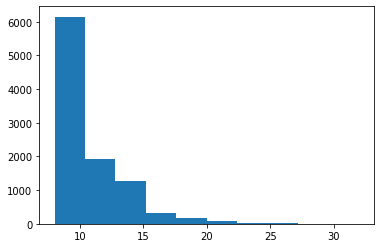

In [7]:
len_erg_examples = []

for ex in erg_examples:
    len_erg_examples.append(len(ex[0])+1)

# len_erg_examples

plt.figure()
plt.hist(len_erg_examples)
plt.show()

In [17]:
c=0
for i in len_erg_examples:
    if i>20:
        c+=1
c    

96

# :::::::::::::::::::::::::::::::::::ROUGH::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Calculation of Probability for a False Match of SDRs

In [12]:
from scipy.special import comb as ncr
    
def false_match_prob(a,n,s,th):
    summ = 0
    for i in range(th, s+1):
        summ += ncr(s,i, exact=True)*ncr(n-s,a-i, exact=True)
    
    prob = summ/ncr(n,a, exact=True)
    return prob

a = 25
n = 1000
s = 32
th = 12   
        
false_match_prob(a,n,s,th)

4.696991823101967e-13

In [94]:
chars='TSXPV#'
emb_chars = 'TP'

graph = [[(1,5),('T','P')] , [(1,2),('S','X')], \
           [(3,5),('V','X')], [(6,),('#')], \
           [(4,2,3),('T','P','S')], [(4,),('V')] ]


# TO GENERATE SEQUENCES OF SRG
def generateSequences(minLength=5):
    """
    Returns a tuple with
    first entry: as array of chars generated from SRG
    second entry: as array of next possible transitions from each char in the first entry
    """
    while True:
        node = 0
        inchars = []
        outchars = []    
        while node != 6:
            transitions = graph[node]
            i = np.random.randint(0, len(transitions[0]))
            inchars.append(transitions[1][i])
            outchars.append(transitions[1])
            node = transitions[0][i]
        if len(inchars) > minLength:  
            return inchars, outchars
        
        
# TO GENERATE ONE-HOT ENCODINGS OF THE OUTPUT ARRAYS OF 'generateSequences()' function
def get_one_srg(minLength=5):
    inchars, outchars = generateSequences(minLength)
    inseq = []
    outseq= []
    for i,o in zip(inchars, outchars): 
        inpt = np.zeros(6)
        inpt[chars.find(i)] = 1.     
        outpt = np.zeros(6)
        for oo in o:
            outpt[chars.find(oo)] = 1.
        inseq.append(inpt)
        outseq.append(outpt)
    return inseq, outseq


# TO CONVERT BACK INTO SYMBOLS FROM THE ONE-HOT ENCODINGS
def OnehotToWord(sequence):
    """
    converts a sequence (one-hot) in a reber string
    """
    reberString = ''
    for s in sequence:
        index = np.where(s==1.0)[0][0]
        reberString += chars[index]
    reberString+='#'
    return reberString


def get_n_srg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_srg(minLength))
    return examples



# ____________________________________For ERG strings__________________________________________#


def get_char_onehot(char):
    char_oh = np.zeros(6)
    if chars.find(char) == -1:
        print('Character NOT in Grammar')
        return
    else:
        char_oh[chars.find(char)] = 1.
    return char_oh 


def get_one_erg(minLength=5):
    
    simple_in, simple_out = get_one_srg()
    emb_in = simple_in[:]
    emb_out = simple_out[:]
    
    emb_char = emb_chars[np.random.randint(0, len(emb_chars))]
    emb_char_oh = get_char_onehot(emb_char)
    
    emb_in[1:1] = [emb_char_oh]
    emb_in.insert(len(emb_in), emb_char_oh)
    print('Embedded INPUT string:', OnehotToWord(emb_in))
    
    emb_out[1:1] = [simple_out[0]]
    emb_out.insert(len(emb_out)-1, get_char_onehot(emb_char))

    return emb_in, emb_out


def get_n_erg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_erg(minLength))
    return examples


def in_grammar(word):
    node = 0    
    for c in word[1:]:
        transitions = graph[node]
        try:
            node = transitions[0][transitions[1].index(c)]
        except ValueError: # using exceptions for flow control in python is common
            return False
    return True        

In [ ]:
in_seq, out_seq = get_one_embedded_example(minLength=5)

print('Input sequence starting at char index 0 until the second to the last:\n')
print(in_seq)
print('-----------------------------------')
print('Input sequence as character:')
print(sequenceToWord(in_seq))
print('-----------------------------------')
print('Target sequence starting at char index 1 until the last')
print(sequenceToWord(out_seq))
print('-----------------------------------')
print('Validate a string:')
### Append 'E' to input sequence as char at last index is ommited
print(in_grammar(sequenceToWord(in_seq)+'E'))

In [ ]:
print(chars)

simple_in, simple_out = get_one_example()
print('\nSimple INPUT string (one-hot):', simple_in)
# print(o)

emb_char = emb_chars[np.random.randint(0, len(emb_chars))]
print('\nThis is embedded char:', emb_char)

oh_emb_char = get_char_one_hot(emb_char)
# print('\nThis is embedded chars one-hot encoding:', oh_emb_char)

emb_in = simple_in[:]
# print('\nString before embedding:', emb_in)
emb_in[1:1] = [oh_emb_char]
# print('\nString after front embedding:', emb_in)
emb_in.insert(len(emb_in), oh_emb_char)
# print('\nString after end embedding:', emb_in)
print('\nEmbedded INPUT string:', sequenceToWord(emb_in))

print('\n\n\n Simple OUTPUT string (one-hot):', simple_out)
print('\n Length of Simple OUTPUT string: ', len(simple_out))
emb_out = simple_out[:]
emb_out[1:1] = [simple_out[0]]
emb_out.insert(len(emb_out)-1, simple_out[0])
print('\nEmbedded OUTPUT string (one-hot):', emb_out)
print('\n Length of Embedded OUTPUT string: ', len(emb_out))